In [1]:
import os
import json
import pandas as pd

In [277]:
os.listdir('record')

['20news_doc2vec_gensim.csv',
 '20news_mpnet_sklearn.csv',
 '20news_average_gensim.csv',
 '20news_bert_gensim.csv',
 '20news_mpnet_keybert.csv',
 'IMDB_mpnet_gensim.csv',
 'agnews_mpnet_gensim.csv',
 '20news_mpnet_gensim.csv',
 '.ipynb_checkpoints',
 '20news_mpnet_yake.csv']

In [333]:
df = pd.read_csv('record/20news_mpnet_gensim.csv')

new_cols = []
for col in df.columns:
    if col == 'semantic precision[v1]@5':
        col = 'semantic_precision@5'
    elif col == 'semantic precision[v1]@10':
        col = 'semantic_precision@10'
    elif col == 'semantic precision[v1]@15':
        col = 'semantic_precision@15'
    elif col == 'semantic precision [v2]@5':
        col = 'semantic_precision_v2@5'
    elif col == 'semantic precision [v2]@10':
        col = 'semantic_precision_v2@10'
    elif col == 'semantic precision [v2]@15':
        col = 'semantic_precision_v2@15'
    elif col == 'precision [v1]@5':
        col = 'precision@5'
    elif col == 'precision [v1]@10':
        col = 'precision@10'
    elif col == 'precision [v1]@15':
        col = 'precision@15'
    elif col == 'precision [v2]@5':
        col = 'precisionv2@5'
    elif col == 'precision [v2]@10':
        col = 'precisionv2@10'
    elif col == 'precision [v2]@15':
        col = 'precisionv2@15'
    else:
        pass
    new_cols.append(col)
    
df.columns = new_cols
df

,semantic_precision@5,semantic_precision@10,semantic_precision@15,semantic_precision_v2@5,semantic_precision_v2@10,semantic_precision_v2@15,precision@5,precision@10,precision@15,precisionv2@5,precisionv2@10,precisionv2@15,ndcg@5,ndcg@10,ndcg@15,ndcg@all
0,0.8810,0.8107,0.7486,0.4164,0.4263,0.4437,0.8514,0.7562,0.6797,0.3943,0.3930,0.3979,0.6615,0.6385,0.6195,0.7395
1,0.8824,0.8050,0.7423,0.4151,0.4249,0.4418,0.8532,0.7524,0.6755,0.3941,0.3909,0.3971,0.6610,0.6372,0.6189,0.7381
2,0.8812,0.8018,0.7373,0.4176,0.4278,0.4443,0.8514,0.7488,0.6715,0.3968,0.3943,0.3996,0.6658,0.6408,0.6220,0.7407
3,0.8836,0.8044,0.7394,0.4134,0.4236,0.4420,0.8533,0.7510,0.6726,0.3930,0.3916,0.3970,0.6609,0.6379,0.6183,0.7384
4,0.8809,0.8042,0.7403,0.4179,0.4276,0.4444,0.8510,0.7526,0.6757,0.3954,0.3961,0.4010,0.6642,0.6413,0.6222,0.7407
5,0.8821,0.8079,0.7468,0.4150,0.4249,0.4431,0.8564,0.7578,0.6810,0.3958,0.3927,0.3984,0.6637,0.6404,0.6207,0.7403
6,0.8840,0.8110,0.7491,0.4108,0.4208,0.4403,0.8572,0.7578,0.6827,0.3905,0.3885,0.3963,0.6581,0.6355,0.6175,0.7378
7,0.8890,0.8149,0.7525,0.4144,0.4236,0.4422,0.8631,0.7624,0.6840,0.3931,0.3907,0.3958,0.6610,0.6378,0.6185,0.7387
8,0.8807,0.8080,0.7470,0.4158,0.4224,0.4426,0.8559,0.7581,0.6818,0.3966,0.3915,0.3983,0.6624,0.6387,0.6202,0.7392
9,0.8813,0.8035,0.7369,0.4156,0.4246,0.4415,0.8538,0.7524,0.6714,0.3954,0.3922,0.3977,0.6627,0.6390,0.6189,0.7389


In [334]:
os.listdir('experiment')

['IMDB_mpnet_tf-idf-gensim_ListNet_sigmoid_L1',
 '20news_doc2vec_tf-idf-gensim_MSE',
 'agnews_mpnet_tf-idf-gensim_ListNet_sigmoid_L1',
 '20news_average_tf-idf-gensim_ListNet_sigmoid_L1',
 '20news_mpnet_yake_ListNet_sigmoid_L1',
 '20news_mpnet_tf-idf_ListNet_sigmoid_L1',
 '20news_mpnet_tf-idf-gensim_ListNet_sigmoid_L1',
 '20news_average_tf-idf-gensim_MSE',
 '20news_bert_tf-idf-gensim_ListNet_sigmoid_L1',
 '20news_mpnet_keybert_ListNet_sigmoid_L1',
 '20news_doc2vec_tf-idf-gensim_ListNet_sigmoid_L1']

In [335]:
def get_results(plot_dir):
    with open(os.path.join(plot_dir, 'result.json'), 'r') as f:
        r = json.load(f)

    result = []    
    for i in range(len(r)):
        r_df = []
        epochs = []
        for j in range(len(r[i])):
            r_df.append(r[i][j]['test'])
            epochs.append(r[i][j]['epoch'])
        r_df = pd.DataFrame(r_df)
        result.append(r_df.iloc[-1])
        
    result = pd.DataFrame(result).reset_index(drop=True)
    
    return x, result

In [336]:
dir_f = 'experiment'
s1 = '20news_mpnet_tf-idf-gensim'

s = s1 + '_ListNet_sigmoid_L1'
r = get_results(f'{dir_f}/{s}/default')
df2 = r[1]
df2

,precision@5,precision@10,precision@15,precisionv2@5,precisionv2@10,precisionv2@15,ndcg@5,ndcg@10,ndcg@15,ndcg@all,semantic_precision@5,semantic_precision@10,semantic_precision@15,semantic_precision_v2@5,semantic_precision_v2@10,semantic_precision_v2@15
0,0.859675,0.766605,0.692338,0.381956,0.371954,0.371469,0.648012,0.621217,0.601105,0.728223,0.906056,0.841702,0.782821,0.408810,0.414239,0.427048
1,0.857080,0.770154,0.694803,0.378602,0.371637,0.368597,0.647828,0.622092,0.601496,0.728790,0.906303,0.841896,0.782162,0.406850,0.413268,0.425082
2,0.857927,0.762067,0.688759,0.382609,0.373870,0.372670,0.652334,0.624945,0.605629,0.730847,0.903372,0.836246,0.778478,0.409569,0.414230,0.427831
3,0.862641,0.765210,0.695051,0.379767,0.370692,0.369474,0.648174,0.621046,0.601816,0.728286,0.907504,0.842338,0.786064,0.404396,0.411670,0.424317
4,0.862165,0.769818,0.693856,0.381515,0.370533,0.369291,0.649426,0.622762,0.602257,0.729314,0.907327,0.841517,0.782915,0.406886,0.409163,0.424359
5,0.859057,0.764998,0.693026,0.379396,0.369191,0.367090,0.648293,0.620839,0.600645,0.728241,0.904944,0.839345,0.782745,0.406073,0.411220,0.422464
6,0.861141,0.769059,0.693009,0.383510,0.369200,0.367302,0.649150,0.621631,0.601581,0.728693,0.905279,0.842329,0.780985,0.409110,0.410576,0.423282
7,0.857768,0.762562,0.690660,0.378637,0.371310,0.370062,0.644811,0.618836,0.599664,0.727308,0.902348,0.837394,0.781585,0.405561,0.413268,0.426136
8,0.863242,0.768459,0.694680,0.378319,0.371054,0.369080,0.648731,0.622302,0.601402,0.728811,0.909128,0.843856,0.784952,0.404149,0.413815,0.425459
9,0.861035,0.765113,0.692120,0.383210,0.370877,0.371210,0.651562,0.623069,0.603520,0.729323,0.905491,0.840113,0.781332,0.407027,0.412403,0.427101


In [337]:
cols=df.columns#['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']
cols=['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']
cols=['precision@15', 'precisionv2@15', 'semantic_precision_v2@15', 'ndcg@15']


In [338]:
df[cols].mean()

precision@15                0.67759
precisionv2@15              0.39791
semantic_precision_v2@15    0.44259
ndcg@15                     0.61967
dtype: float64

In [339]:
df2[cols].mean()

precision@15                0.692830
precisionv2@15              0.369625
semantic_precision_v2@15    0.425308
ndcg@15                     0.601911
dtype: float64

In [340]:
for col in cols:
    print(col)
    print(df[col].mean(), df[col].std())
    print(df2[col].mean(), df2[col].std())
    
    test_result = stats.ttest_ind(df[col], r[1][col], alternative='greater', equal_var=False)
    print(test_result)
    print()

precision@15
0.67759 0.004821813858797217
0.6928301912243083 0.0019831059973930702
Ttest_indResult(statistic=-9.243680643459701, pvalue=0.9999995731670152)

precisionv2@15
0.39790999999999993 0.001540887190333334
0.3696245481907311 0.001785131456415604
Ttest_indResult(statistic=37.9302402023585, pvalue=1.2027509998467361e-18)

semantic_precision_v2@15
0.44259000000000004 0.0013016655996581105
0.4253077919020716 0.0017463076487198065
Ttest_indResult(statistic=25.09171701254404, pvalue=5.8257297788349e-15)

ndcg@15
0.6196699999999999 0.0015755422347031175
0.6019113056740518 0.0016459803917757438
Ttest_indResult(statistic=24.6468292592715, pvalue=1.330964029890698e-15)



In [311]:
# from scipy import stats
# import numpy as np
# rng = np.random.default_rng()
# stats.ttest_ind(rvs1, rvs2, alternative='greater', equal_var=False)

In [3]:
exp_dir = 'experiment'
keyword = ''
keyword2 = ''

x = [os.path.join(exp_dir, s) for s in os.listdir(exp_dir) if keyword in s and keyword2 in s]
x

['experiment/20news_bert_tf-idf_MSE',
 'experiment/20news_bert_tf-idf_BCE',
 'experiment/20news_mpnet_tf-idf_MSE',
 'experiment/20news_average_tf-idf_ListNet_sigmoid_L1',
 'experiment/IMDB_mpnet_tf-idf_MSE',
 'experiment/20news_average_tf-idf_BCE',
 'experiment/20news_bert_tf-idf_ListNet_sigmoid_L1',
 'experiment/agnews_mpnet_tf-idf_BCE',
 'experiment/20news_doc2vec_tf-idf_ListNet_sigmoid_L1',
 'experiment/20news_mpnet_tf-idf-gensim_MSE',
 'experiment/IMDB_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment/wiki_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment/20news_mpnet_tf-idf_BCE',
 'experiment/IMDB_mpnet_tf-idf_BCE',
 'experiment/20news_average_tf-idf_MSE',
 'experiment/20news_mpnet_yake_ListNet_sigmoid_L1',
 'experiment/agnews_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment/20news_mpnet_yake_MSE',
 'experiment/agnews_mpnet_tf-idf_MSE',
 'experiment/20news_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment/wiki_mpnet_tf-idf_MSE',
 'experiment/20news_mpnet_keybert_MSE',
 'experiment/20news_doc

In [4]:
# check empty folder
import shutil
cnt = 0

print('empty folder:')
for s in x:
    s = os.path.join(s, 'default')
    if 'result.json' not in os.listdir(s):
        cnt += 1
        print(s)

empty folder:
experiment/wiki_mpnet_tf-idf_BCE/default


In [5]:
s1 = '20news_mpnet_tf-idf'
dir_f = 'experiment'

precision@10                0.795590
precisionv2@10              0.354520
semantic_precision_v2@10    0.397500
ndcg@10                     0.619206
Name: 30, dtype: float64

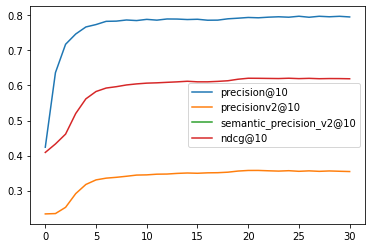

In [6]:
s = s1 + '_ListNet_sigmoid_L1'
r = plot_single_result(f'{dir_f}/{s}/default')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.807238
precisionv2@10              0.344873
semantic_precision_v2@10    0.388074
ndcg@10                     0.612718
Name: 30, dtype: float64

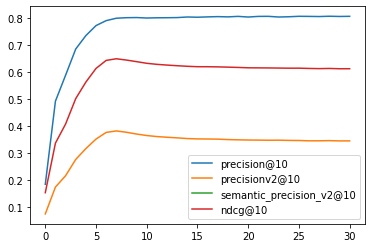

In [7]:
s = s1 + '_BCE'
r = plot_single_result(f'{dir_f}/{s}/default')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.741254
precisionv2@10              0.289095
semantic_precision_v2@10    0.342323
ndcg@10                     0.524411
Name: 30, dtype: float64

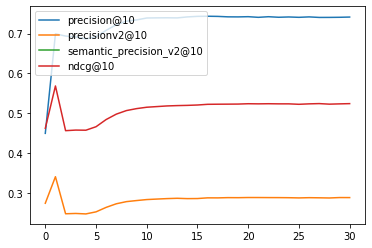

In [8]:
s = s1 + '_MSE'
r = plot_single_result(f'{dir_f}/{s}/default')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

## Cross Domain

In [488]:
exp_dir = 'experiment_cross_0510'
x = [os.path.join(exp_dir, s) for s in sorted(os.listdir(exp_dir)) if keyword in s and keyword2 in s]
x

['experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_BCE',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_ListNet2',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_ListNet3',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_cross_0510/cross_wiki_20news_mpnet_tf-idf_MSE',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_BCE',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_ListNet2',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_ListNet3',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_cross_0510/cross_wiki_IMDB_mpnet_tf-idf_MSE',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_BCE',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_ListNet2',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_ListNet3',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_ListNet_sigmoid_L1',
 'experiment_cross_0510/cross_wiki_agnews_mpnet_tf-idf_MSE']

In [507]:
dir_f = 'experiment_cross_0510'
dir_f2 = 'parameters_baseline'
s1 = 'cross_wiki_20news_mpnet_tf-idf_'

precision@10                0.329158
precisionv2@10              0.116146
semantic_precision_v2@10    0.227469
ndcg@10                     0.231020
Name: 4, dtype: float64

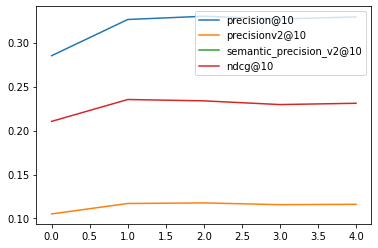

In [508]:
s = s1 + 'BCE'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.296354
precisionv2@10              0.112024
semantic_precision_v2@10    0.216730
ndcg@10                     0.212829
Name: 4, dtype: float64

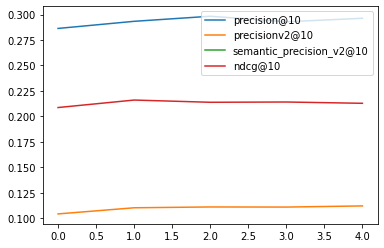

In [509]:
s = s1 + 'MSE'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.313290
precisionv2@10              0.113057
semantic_precision_v2@10    0.223895
ndcg@10                     0.226814
Name: 4, dtype: float64

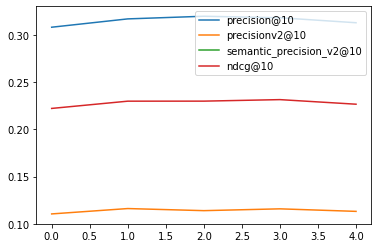

In [510]:
s = s1 + 'ListNet2'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.309995
precisionv2@10              0.113165
semantic_precision_v2@10    0.219720
ndcg@10                     0.227216
Name: 4, dtype: float64

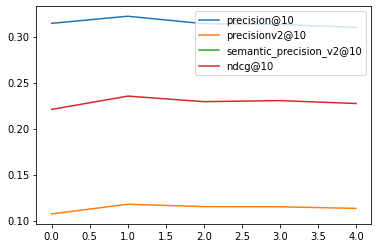

In [511]:
s = s1 + 'ListNet3'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]

precision@10                0.315401
precisionv2@10              0.113111
semantic_precision_v2@10    0.226446
ndcg@10                     0.226671
Name: 4, dtype: float64

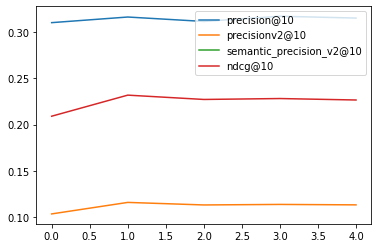

In [512]:
s = s1 + 'ListNet_sigmoid_L1'
r = plot_single_result(f'{dir_f}/{s}/{dir_f2}')
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].plot()
r[1][['precision@10', 'precisionv2@10', 'semantic_precision_v2@10', 'ndcg@10']].iloc[-1]